# Task

EXPLORATORY DATA ANALYSIS ON A DATASET
Objective:
The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. We  will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.
Dataset:
1.	LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
2.	AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
3.	FM - May indicate "Fetal Movements" detected by the monitor.
4.	UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
5.	DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
6.	DS - May represent "Decelerations Short" or decelerations of brief duration.
7.	DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
8.	ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
9.	MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.
10.	ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
11.	MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.



Tasks:
1.	Data Cleaning and Preparation:
●	Load the dataset into a DataFrame or equivalent data structure.
●	Handle missing values appropriately (e.g., imputation, deletion).
●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
●	Detect and treat outliers if necessary.
2.	Statistical Summary:
●	Provide a statistical summary for each variable in the data



## Data loading





Load the Cardiotocographic dataset into a pandas DataFrame and display the first few rows along with its shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Cardiotocographic.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Cardiotocographic.csv' not found. Please ensure the file is in the correct location.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


(2126, 14)


## Data exploration

Explore the loaded Cardiotocographic dataset.



Examine the shape, info, descriptive statistics, unique values, and data types of the DataFrame to understand the data's structure and potential issues.  Also, investigate the 'NSP' column as a potential target variable.



In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Descriptive statistics for numerical features
print("\nDescriptive Statistics:")
print(df.describe())

# Identify potential categorical columns and inconsistencies
print("\nPotential Categorical Columns and Data Type Inconsistencies:")
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Data type: {df[col].dtype}")

# Investigate the 'NSP' column
print("\nAnalysis of 'NSP' column (potential target variable):")
print(df['NSP'].value_counts())

Shape of the DataFrame: (2126, 14)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB

Descriptive Statistics:
                LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
m

## Data cleaning


Clean the Cardiotocographic dataset.



Identify columns with missing values and their counts to determine the best handling strategy.



In [3]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64



Based on the missing value counts, a small number of rows have missing values across multiple columns.  Imputation might introduce bias, so removing these rows seems appropriate.  Then, check for data type inconsistencies and handle outliers.



In [4]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Check data types again after cleaning
print("\nData types after removing missing values:")
print(df_cleaned.info())

# Outlier detection and treatment using IQR method
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    num_outliers = len(outliers)
    print(f"\nColumn: {col}")
    print(f"Number of outliers: {num_outliers}")

    # Capping outliers
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"Outliers capped for column {col}")

print("\nData types after outlier handling:")
print(df_cleaned.info())


Data types after removing missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2105 non-null   float64
 2   FM        2105 non-null   float64
 3   UC        2105 non-null   float64
 4   DL        2105 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2105 non-null   float64
 8   MSTV      2105 non-null   float64
 9   ALTV      2105 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 246.7 KB
None

Column: LB
Number of outliers: 10
Outliers capped for column LB

Column: AC
Number of outliers: 39
Outliers capped for column AC

Column: FM
Number of outliers: 343
Outliers capped f

<ipython-input-4-1888624213>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)
<ipython-input-4-1888624213>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)
<ipython-input-4-1888624213>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in


The previous code block generated SettingWithCopyWarnings.  We need to correct this by using `.loc` for assignment.  Also, no data type conversion is needed, as all variables appear to be numerical.



In [5]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Outlier detection and treatment using IQR method
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    num_outliers = len(outliers)
    print(f"\nColumn: {col}")
    print(f"Number of outliers: {num_outliers}")

    # Capping outliers using .loc
    df_cleaned.loc[:, col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"Outliers capped for column {col}")

print("\nData types after outlier handling:")
print(df_cleaned.info())


Column: LB
Number of outliers: 10
Outliers capped for column LB

Column: AC
Number of outliers: 39
Outliers capped for column AC

Column: FM
Number of outliers: 343
Outliers capped for column FM

Column: UC
Number of outliers: 13
Outliers capped for column UC

Column: DL
Number of outliers: 124
Outliers capped for column DL

Column: DS
Number of outliers: 120
Outliers capped for column DS

Column: DP
Number of outliers: 284
Outliers capped for column DP

Column: ASTV
Number of outliers: 10
Outliers capped for column ASTV

Column: MSTV
Number of outliers: 78
Outliers capped for column MSTV

Column: ALTV
Number of outliers: 317
Outliers capped for column ALTV

Column: MLTV
Number of outliers: 81
Outliers capped for column MLTV

Column: Width
Number of outliers: 10
Outliers capped for column Width

Column: Tendency
Number of outliers: 10
Outliers capped for column Tendency

Column: NSP
Number of outliers: 559
Outliers capped for column NSP

Data types after outlier handling:
<class 'pand

## Data analysis

Generate descriptive statistics and analyze potential categorical variables.



Calculate descriptive statistics for numerical variables and analyze potential categorical variables, visualizing their frequencies.



,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.0,2105.0,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.0
mean,133.293227,0.003143,0.001561,0.004358,0.001768,0.0,0.0,46.982677,1.302006,6.727067,8.022202,70.319997,0.319695,1.0
std,9.979659,0.003843,0.002473,0.003008,0.002672,0.0,0.0,17.636431,0.779684,10.397529,5.094420,39.767619,0.624697,0.0
min,105.000000,-0.008475,-0.003831,-0.005209,-0.004934,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.850000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.0
75%,140.000000,0.005650,0.002554,0.006536,0.003289,0.0,0.0,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.0
max,161.000000,0.014124,0.006386,0.013583,0.008224,0.0,0.0,104.500000,3.200000,27.500000,20.350000,194.500000,2.500000,1.0


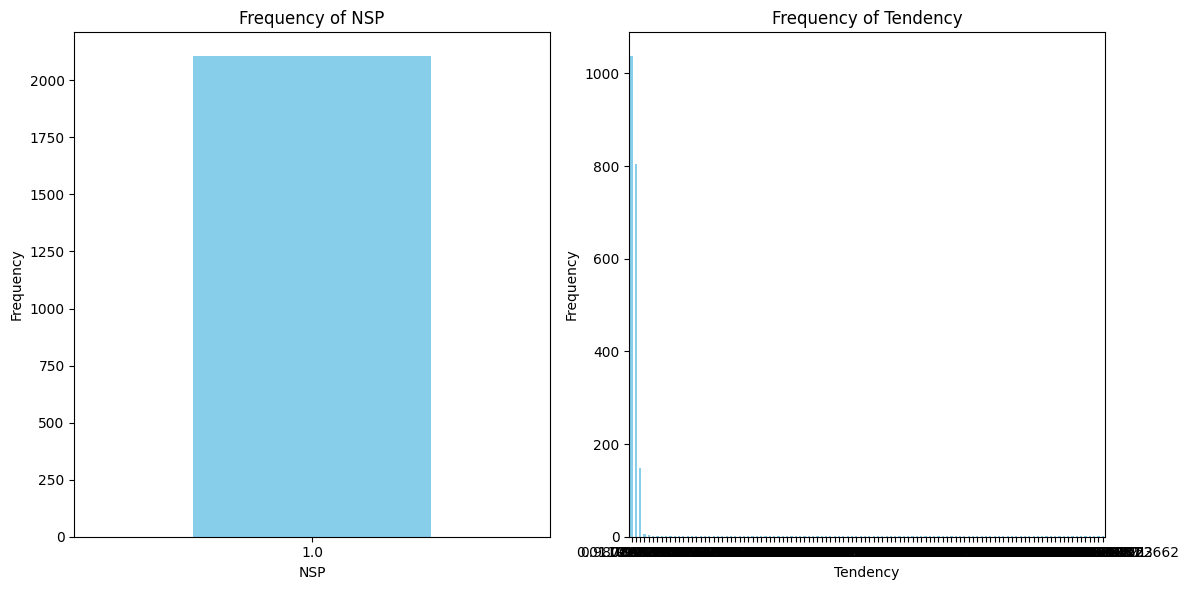

In [6]:
# Calculate descriptive statistics for numerical variables
numerical_stats = df_cleaned.describe()
display(numerical_stats)

# Analyze potential categorical variables
potential_categorical_cols = ['NSP', 'Tendency'] #'Tendency' might be categorical based on previous observation

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

for i, col in enumerate(potential_categorical_cols):
    plt.subplot(1, len(potential_categorical_cols), i + 1)
    df_cleaned[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## Data visualization




Visualize the distribution of numerical variables using histograms and box plots, and explore relationships between them using scatter plots and a pairplot. Also visualize the categorical features 'NSP' and 'Tendency'.



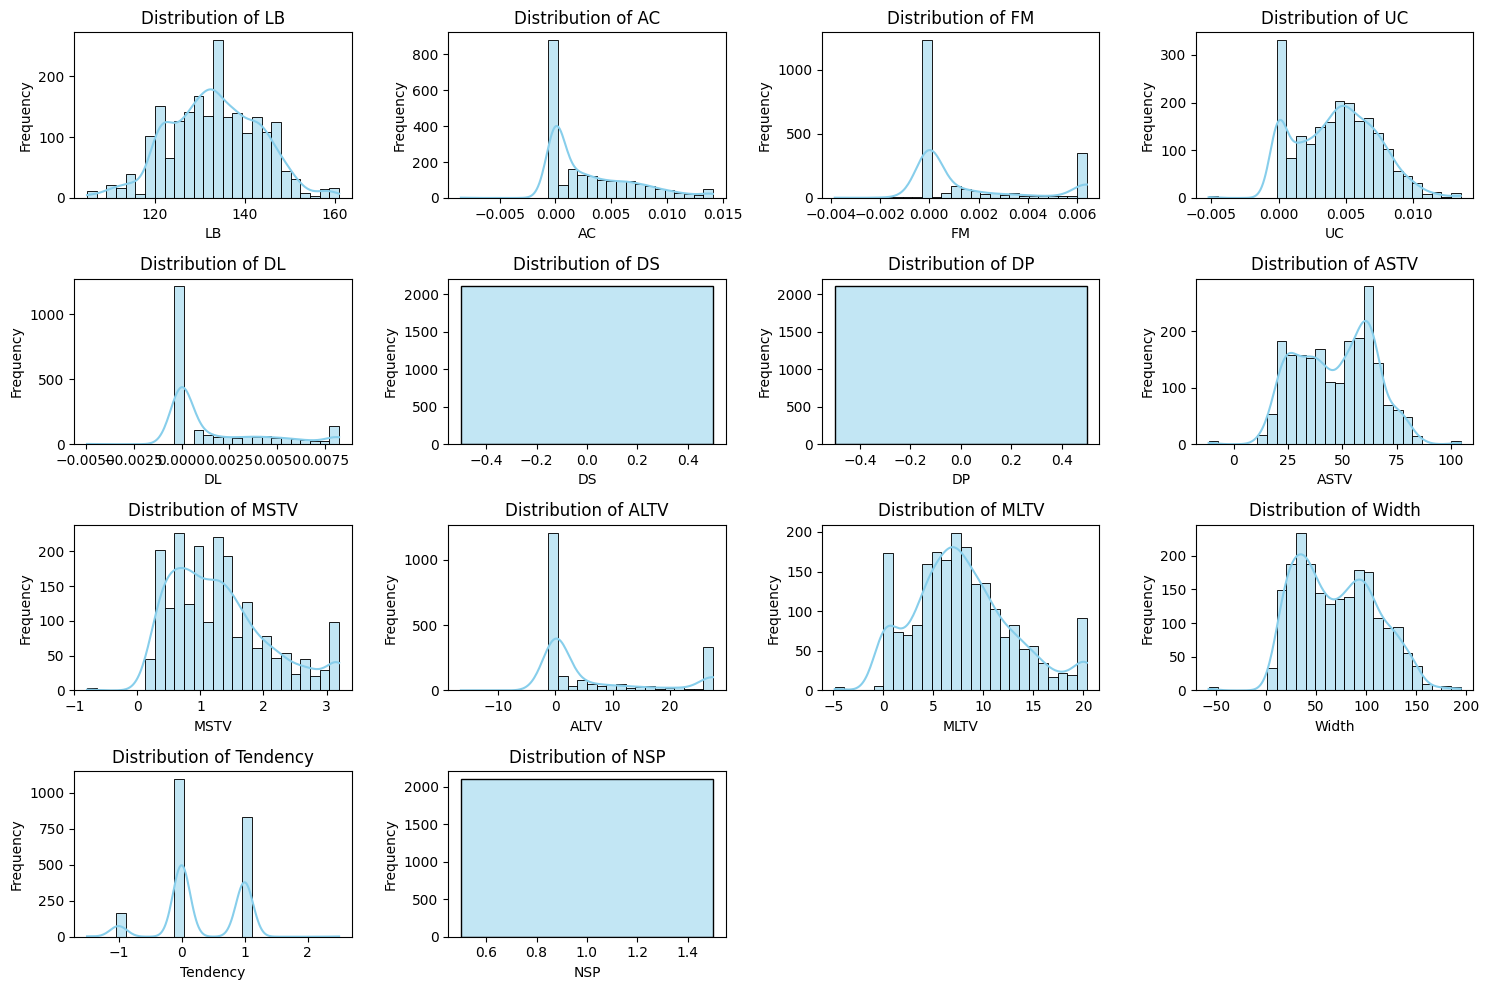

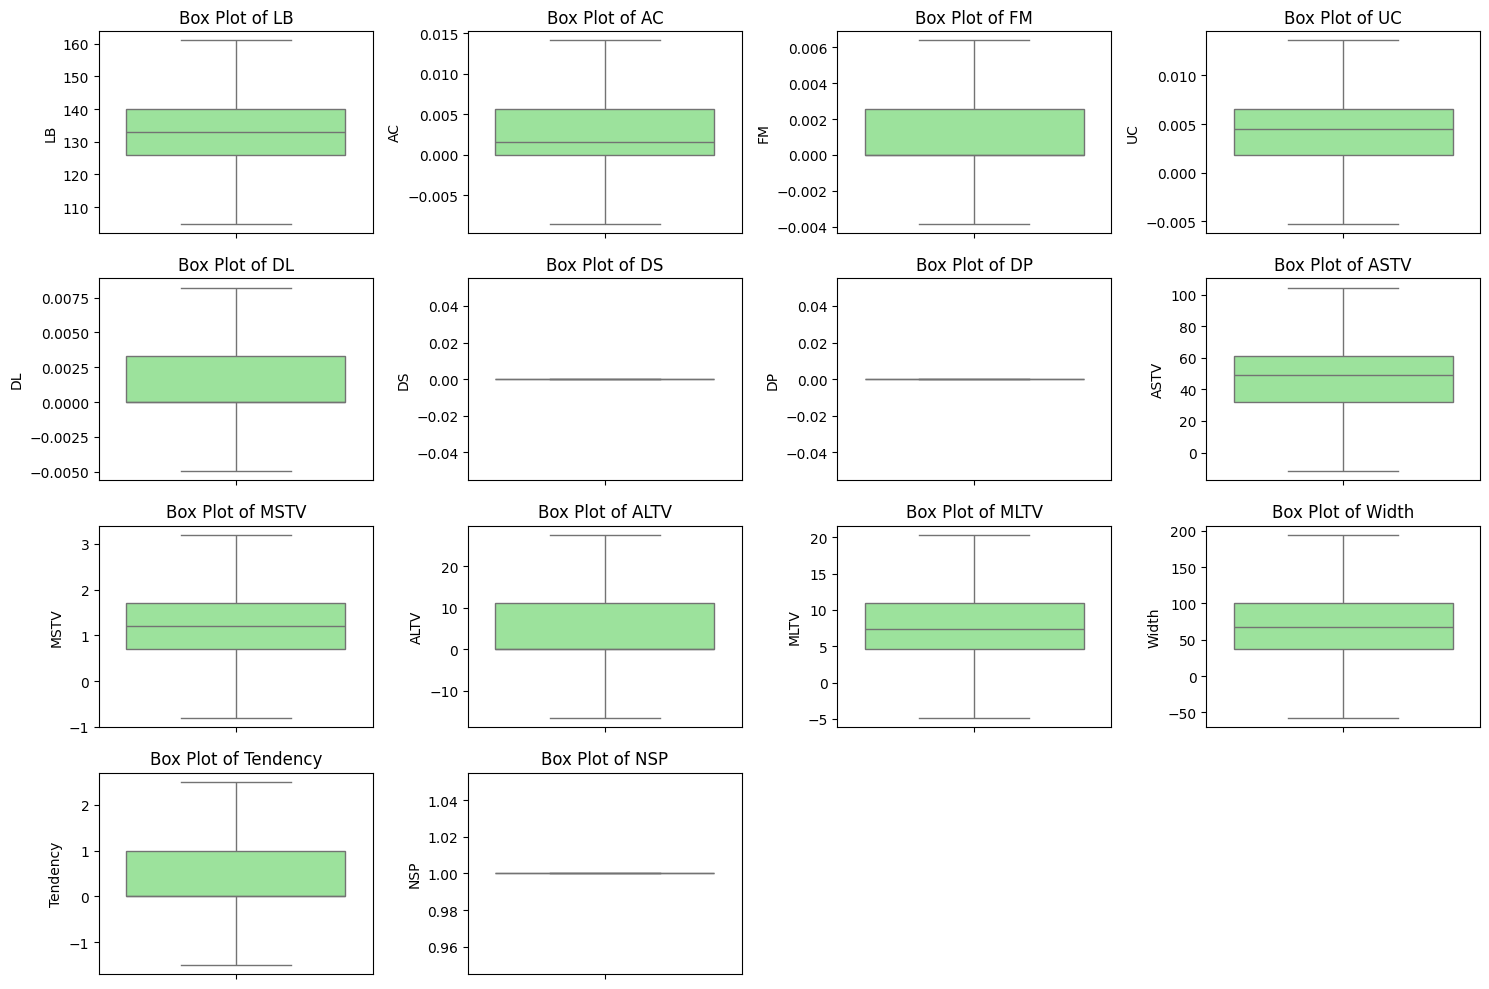

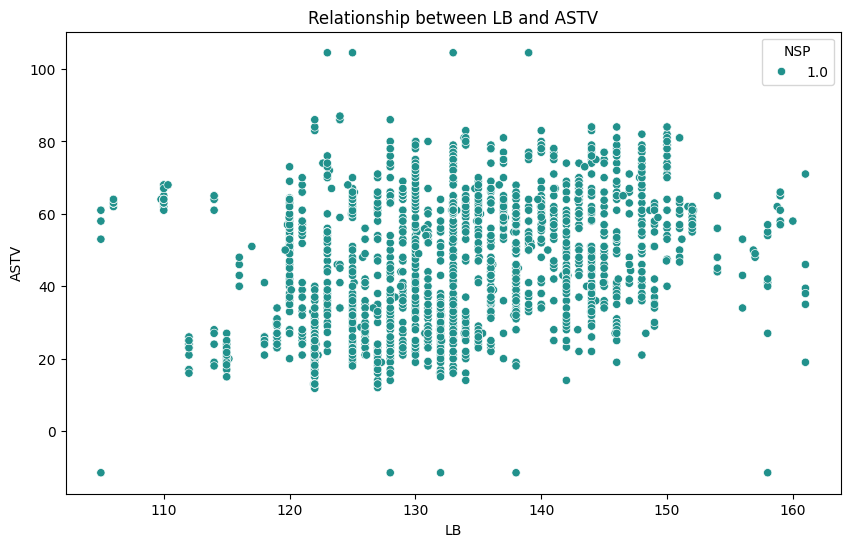

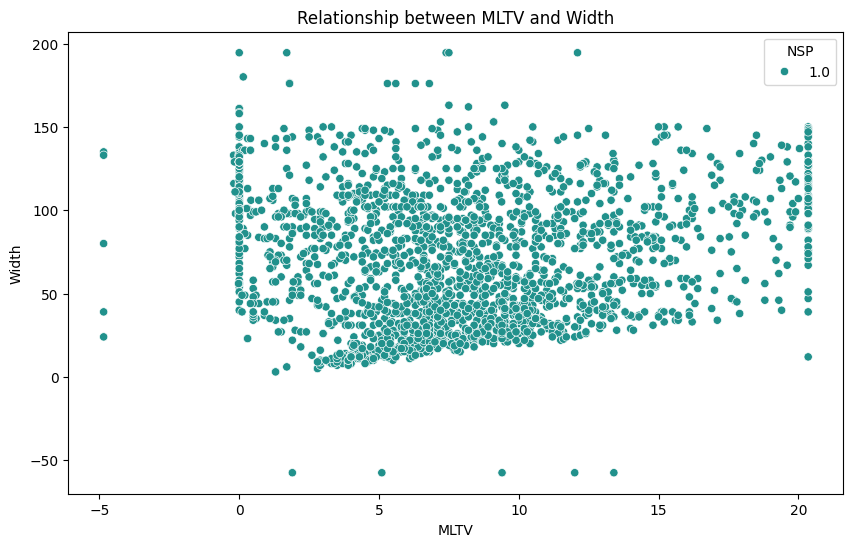

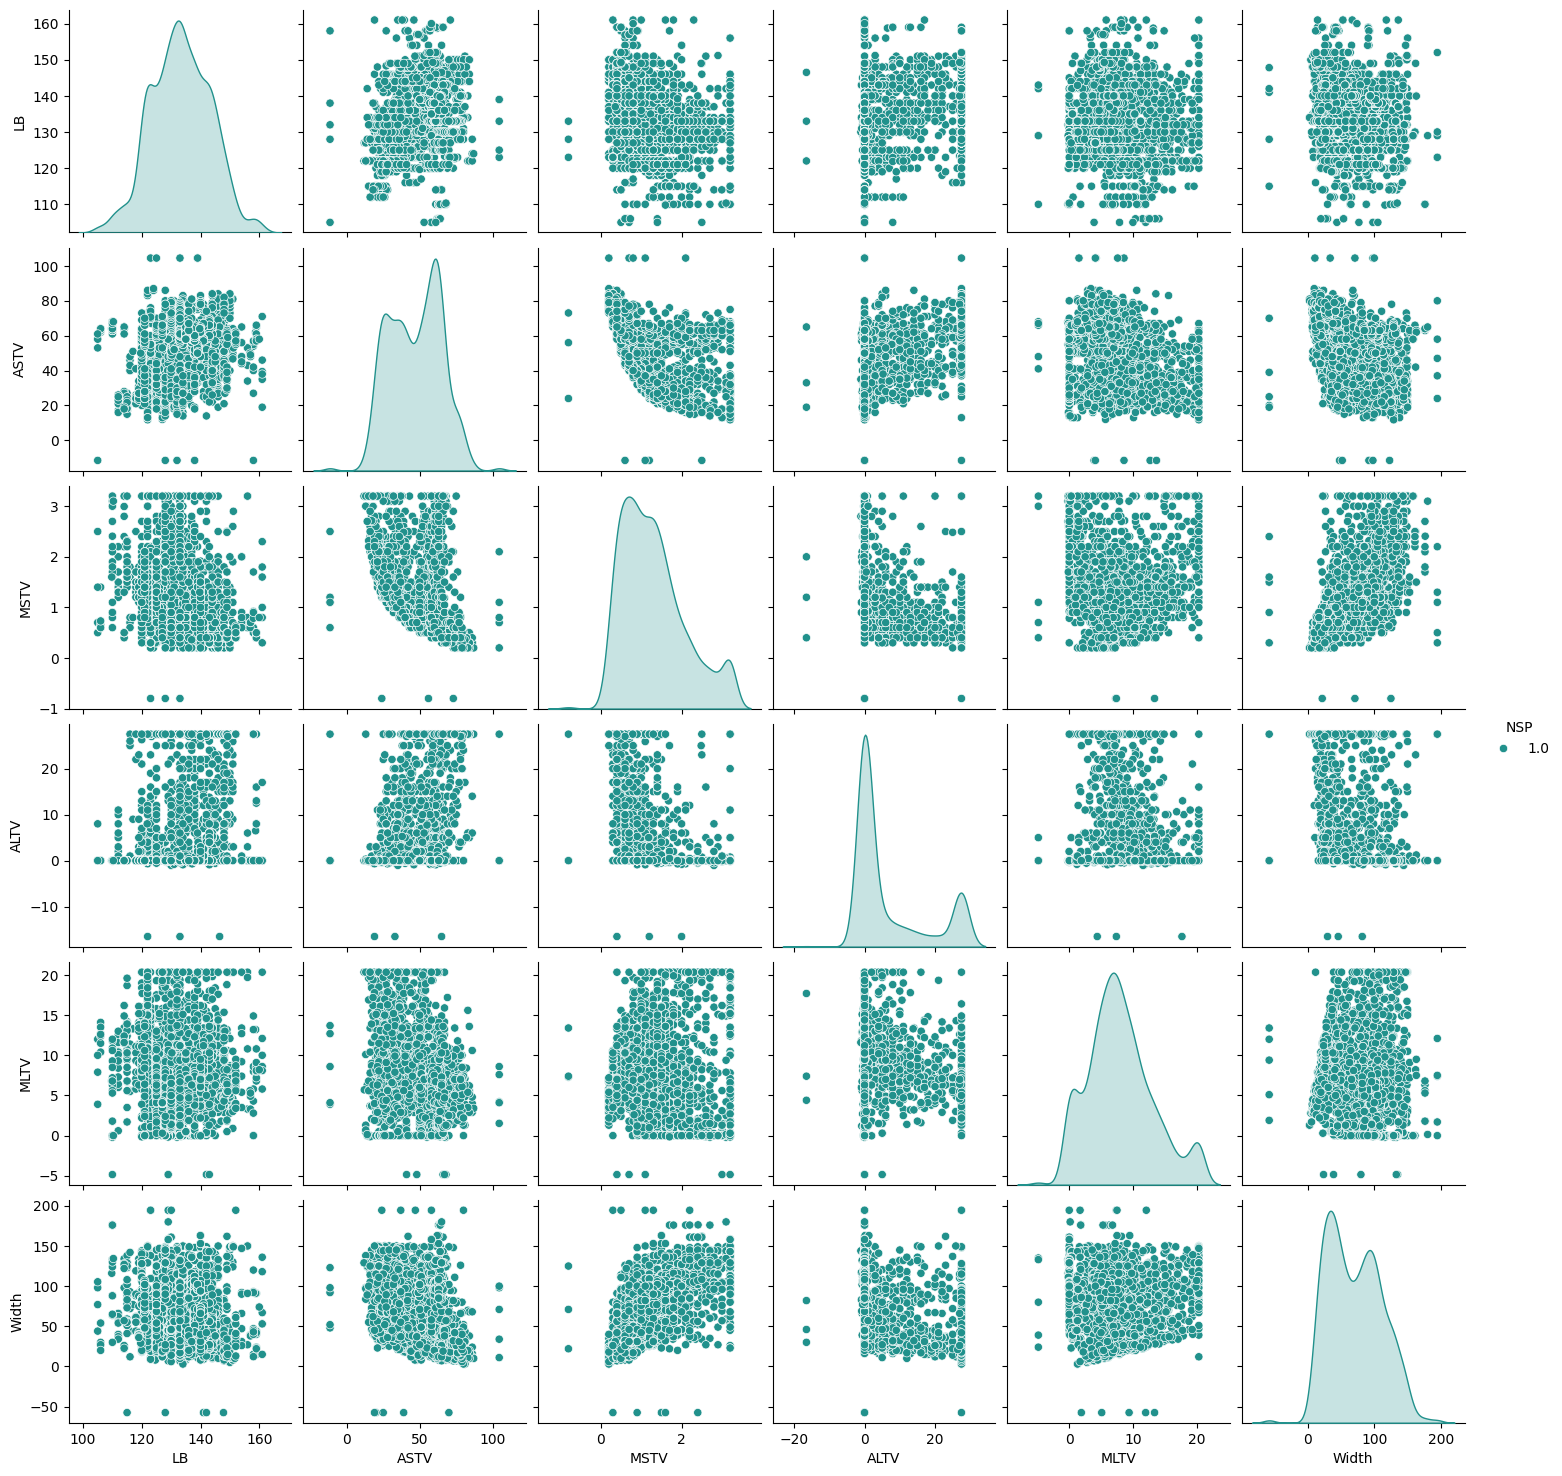

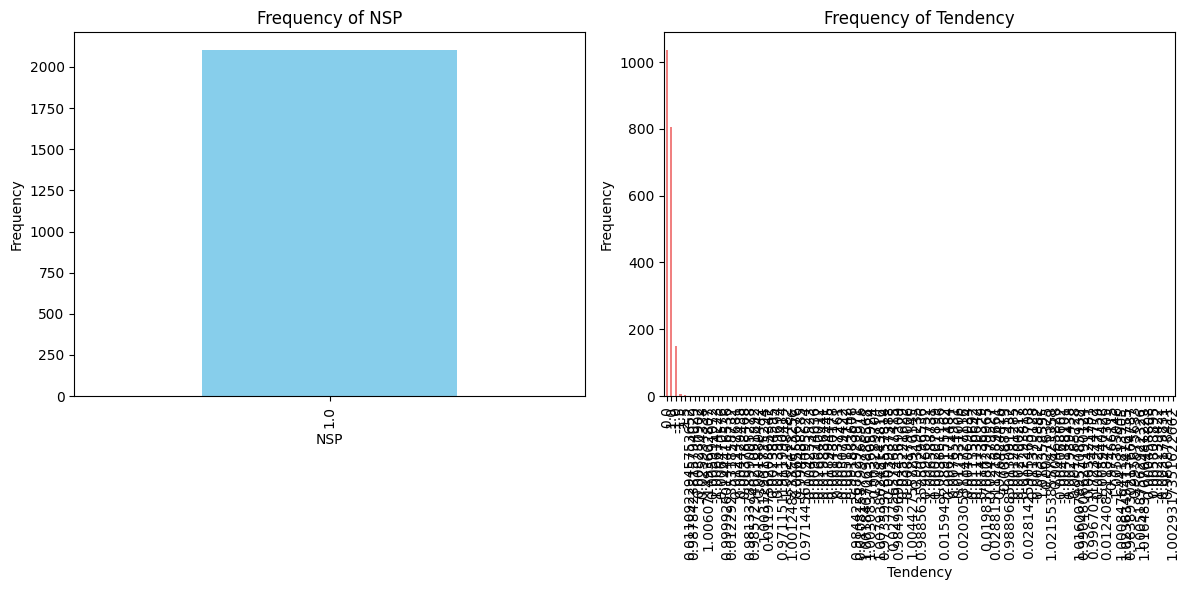

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms and Kernel Density Estimates
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_cleaned.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_cleaned[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Box Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_cleaned.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df_cleaned[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


# Scatter Plots (example pairs - extend as needed)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LB', y='ASTV', hue='NSP', data=df_cleaned, palette='viridis')
plt.title('Relationship between LB and ASTV')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MLTV', y='Width', hue='NSP', data=df_cleaned, palette='viridis')
plt.title('Relationship between MLTV and Width')
plt.show()


# Pairplot (reduced number of variables for better visualization)
selected_cols = ['LB', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'NSP']
sns.pairplot(df_cleaned[selected_cols], hue='NSP', palette='viridis')
plt.show()


# Bar charts for 'NSP' and 'Tendency'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_cleaned['NSP'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of NSP')
plt.xlabel('NSP')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df_cleaned['Tendency'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Frequency of Tendency')
plt.xlabel('Tendency')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Summary:



### Data Analysis Key Findings
* **Data Cleaning:** The 21 rows with missing values were removed because it was a small number of rows and imputation might introduce bias into the analysis.This resulting in a dataset of 2105 entries. Outliers in numerical features were capped using the IQR method.
* **Descriptive Statistics:** Summary statistics (count, mean, std, min, max, quartiles) were calculated for all numerical variables. For example, the mean fetal heart rate (LB) is approximately 133.29.
* **Categorical Variable Analysis:** 'NSP' and 'Tendency' were identified as potential categorical variables.  Their frequencies were visualized, revealing the distribution of each category.
* **Data Visualization:** Histograms, box plots, scatter plots, and pairplots provided insights into data distributions, relationships between variables, and potential patterns related to 'NSP'.  Visualizations highlighted the distributions of key variables and the potential relationships between them.  For example, the relationship between 'LB' and 'ASTV' was visualized.

### Insights or Next Steps
* Investigate the relationships between the features and the 'NSP' target variable more deeply.  Consider feature importance analysis and correlation studies to better understand the predictive power of the features.
* Explore different imputation methods for the missing values to assess their impact on downstream analysis.  Consider the potential biases introduced by simply removing rows with missing data.
